<a href="https://colab.research.google.com/github/SharmaAyush98/EDA_CAPSTONE/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

#<b> 01 Connect To gitHub and Google drive

In [6]:
# Cloning gitHub Repo to colab for csv file connection

!git clone https://github.com/SaurabhAradwad/Superwised-ML-Regression-Project

fatal: destination path 'Superwised-ML-Regression-Project' already exists and is not an empty directory.


In [7]:
# Mounting google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<b> 02 Installation 🧰 and Importing Libraries 📘




In [8]:
# Install klib library
 
# klib is a Python library for importing, cleaning, analyzing and preprocessing data

!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Import klib library
import klib

# Import essential libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import datetime as dt
import warnings; warnings.simplefilter('ignore')

# Importing sklearn plot_tree, DecisionTreeRegressor, accuracy_score, train_test_split 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


#<b> 03 Import CSV 📁 dataset as 🐼 DataFrame and 🔍 Inspection

##<b> Import CSV from drive

In [11]:
# Importing csv dataset as DataFrame using Pandas Read CSV function
df = pd.read_csv('/content/drive/MyDrive/Capstone project /02 Superwised ML Regression/NYC Taxi Data.csv')

##<b> Data Inspection

In [12]:
# Checking Head
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [13]:
# Checking Tail
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [14]:
# Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [15]:
# Checking default data summary using describe method and including non numerical features
df.describe(include= 'all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [16]:
# Count unique values each columns
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [17]:
# Checking null values in each columns if any
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

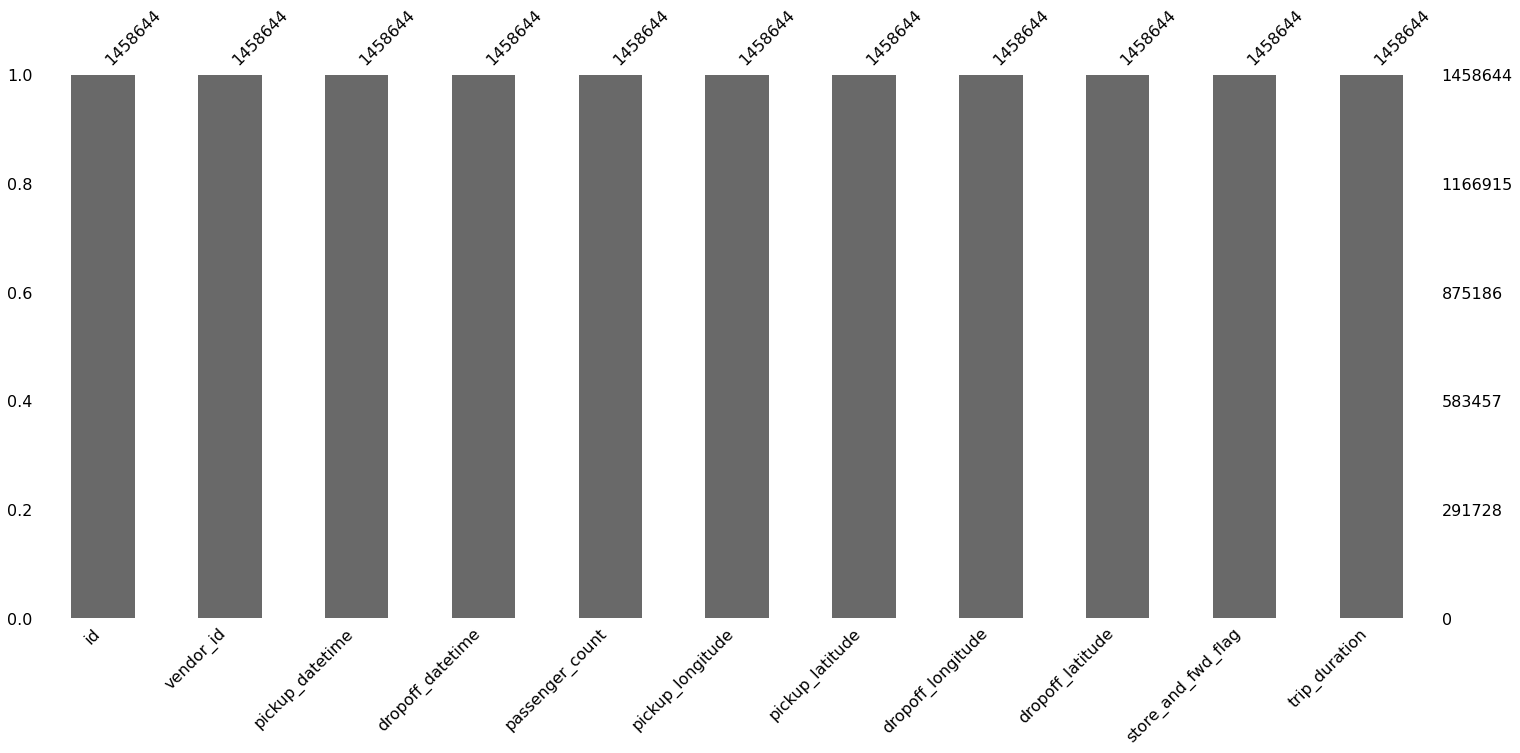

In [18]:
# Countplot for null values(before)

# Visualize the number of missing values (here no any missing values)

msno.bar(df)

#<b> 04 EDA 🔍 on NYC Taxi dataset

#### Let's do some **Exploratary Data Analysis** on given dataset using **klib.**


In [19]:
# klib.describe - functions for visualizing datasets
'''
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
klib.corr_mat(df) # returns a color-encoded correlation matrix
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
klib.dist_plot(df) # returns a distribution plot for every numeric feature
klib.missingval_plot(df) # returns a figure containing information about missing values

'''

'\nklib.cat_plot(df) # returns a visualization of the number and frequency of categorical features\nklib.corr_mat(df) # returns a color-encoded correlation matrix\nklib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations\nklib.dist_plot(df) # returns a distribution plot for every numeric feature\nklib.missingval_plot(df) # returns a figure containing information about missing values\n\n'

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


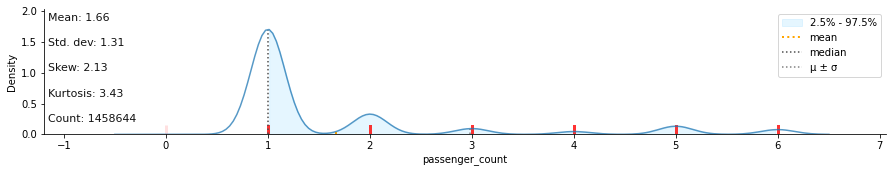

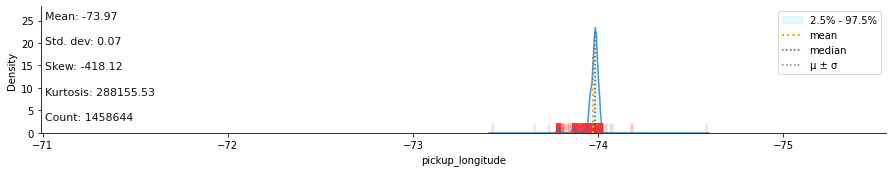

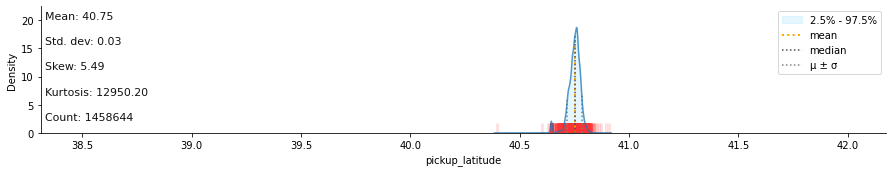

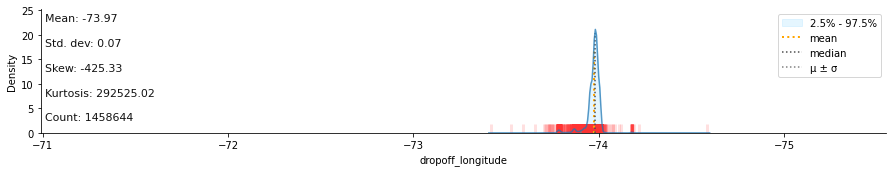

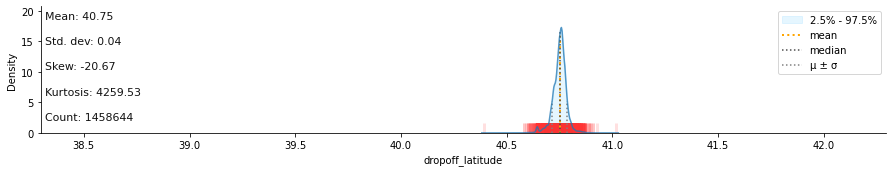

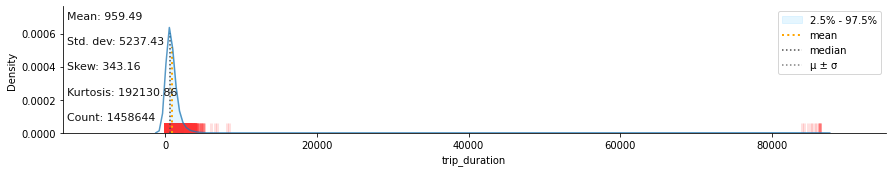

In [20]:
#  A distribution plot for every numeric feature

klib.dist_plot(df) 

In [21]:
#  A color-encoded correlation matrix

klib.corr_mat(df)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.00,0.29,0.01,0.00,0.00,0.00,0.02
passenger_count,0.29,1.00,0.00,-0.01,-0.00,-0.00,0.01
pickup_longitude,0.01,0.00,1.00,0.02,0.78,0.10,0.03
pickup_latitude,0.00,-0.01,0.02,1.00,0.11,0.49,-0.03
dropoff_longitude,0.00,-0.00,0.78,0.11,1.00,0.12,0.01
dropoff_latitude,0.00,-0.00,0.10,0.49,0.12,1.00,-0.02
trip_duration,0.02,0.01,0.03,-0.03,0.01,-0.02,1.00


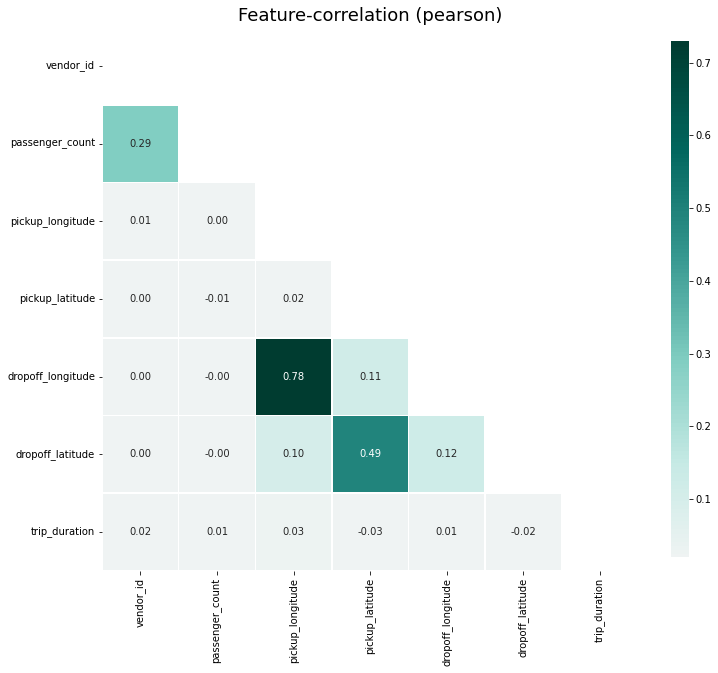

In [22]:
# A color-encoded heatmap for correlations

klib.corr_plot(df) 

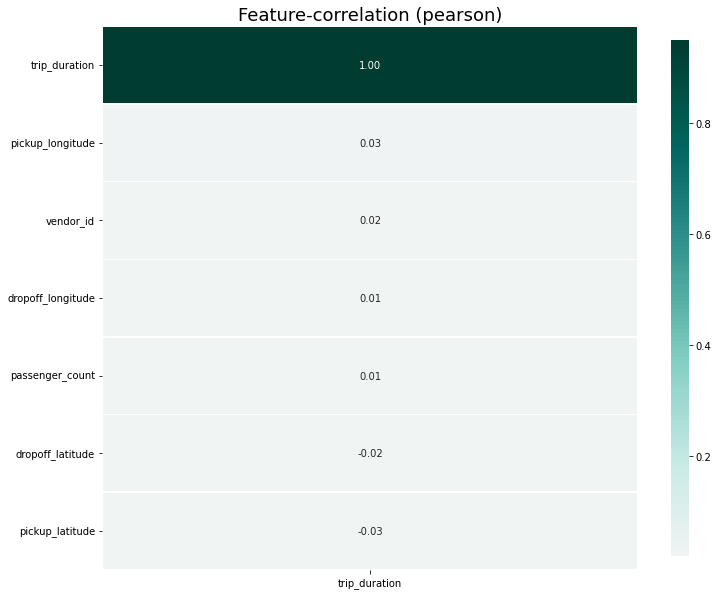

In [23]:
# Correlation graph dependent and independent features

klib.corr_plot(df, target=df['trip_duration']) 

In [24]:
#  A figure containing information about missing values
klib.missingval_plot(df) 

No missing values found in the dataset.


In [25]:
# Checking number of rows and columns in our dataset.

print("Number of rows in dataset are:", df.shape[0])
print("Number of columns in dataset are:", df.shape[1])

Number of rows in dataset are: 1458644
Number of columns in dataset are: 11


In [26]:
# Now let's consider each column in dataset as feture in our dataset.
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#<b> 05  Feature Creation
#### Let us extract **pickup_datetime** and **dropoff_datetimeand** to create some new features using pandas datetime.

In [27]:
# Changing 'object' type of pickup_datetime, dropoff_datetime. Converting it into 'datetime' type.
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [28]:
# It will contain the day number instead of characters with Monday=0 to Sunday=6.
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

# It will convert weekday into number start at Monday=0 and end at Sunday=6.
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

# Extract hour only from pickup_datetime.
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

# Extract month in number only from pickup_datetime with January=1
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

###<b> Newly added Features are 
* pickup_day 
* dropoff_day
* pickup_day_no
* dropoff_day_no
* pickup_hour
* dropoff_hour
* pickup_month
* dropoff_month

##### We will start with **pickup_day** & **dropoff_day** , they contains the name of the day on which the ride was taken as **Monday=0** to **Sunday=6**.

##### **pickup_day_no** & **dropoff_day_no** , they contain the day number instead of characters with **Monday=0** and **Sunday=6**

##### **pickup_hour** & **dropoff_hour** , they contain an hour of the day in the 24-hour format.

##### **pickup_month** & **dropoff_month** , they contain the month number with **January=1** ..... **June=06** till  **December=12**.






During dataset research, we found that the **pickup_longitude**,     **pickup_latitude**, **dropoff_longitude** & **dropoff_latitude** have coordinates in the form of longitude and latitude. But from it, we really can't infer anything or come to any conclusions.

Therefore, **distance** is the most obvious feature we can draw from this. Let's carry it out.

###**Lets Importing the geopy.distance library which will help us calculate distance from geographical coordinates**.

In [29]:
# importing geopy library
from geopy.distance import great_circle

In [30]:
# Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [32]:
# Applying the function to our dataset and creating the feature ‘distance’.
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

**Lets Create New Feature Speed(km/Hr) With help of Distance and Duration Column**

In [33]:
# creating new feature Speed
df['speed'] = (df.distance*3600/(df.trip_duration))

Next,Lets defined a function that lets us determine what time of the day the ride was taken.

We will create four parts of time:-

1.**Morning** (from 6:00 am to 11:59 pm),

2.**Afternoon** (from 12 noon to 3:59 pm),

3.**Evening** (from 4:00 pm to 9:59 pm), and

4.**Late Night** (from 10:00 pm to 5:59 am)

In [34]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [35]:
#Now let us apply this function and create new columns in the dataset.
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [36]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,17,17,3,3,1.498523,11.856445,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,6,6,1.805510,9.803673,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,1,1,6.385108,10.822216,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,2,19,19,4,4,1.485501,12.465739,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,5,13,13,3,3,1.188590,9.836608,Afternoon,Afternoon


In [37]:
#Let us check the data type of all features.
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
distance                     float64
speed                        float64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

Now our dataset is complete for the further analysis before we train our model with optimal variables.

#**Univariate Analysis**
The univariate analysis involves studying patterns of all variables individually.

**Target Variable**

Let us start with the target varibale i.e trip duration.
# **1.Trip duration.**

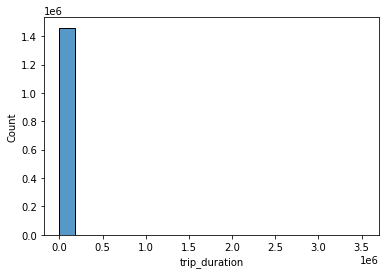

In [38]:
#Plotting histogram of trip duration 
sns.histplot(df['trip_duration'],kde=False,bins=20)

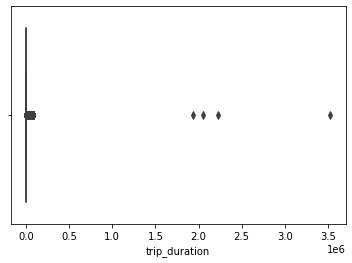

In [39]:
#Plotting boxplot of trip duration
sns.boxplot(df['trip_duration'])

In [40]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [41]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [42]:
#lets see percentile from 0 to 10 
for i in range(0,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 87
2 percentile value is 122
3 percentile value is 146
4 percentile value is 165
5 percentile value is 180
6 percentile value is 195
7 percentile value is 209
8 percentile value is 221
9 percentile value is 233
100 percentile value is  3526282


## **We can see that there are some entries  which are significantly different from others. As there are four rows only, let us drop this row.**

In [43]:
# Setting Trip duration upper limit
nyc_taxi = df[df.trip_duration <= 3400]

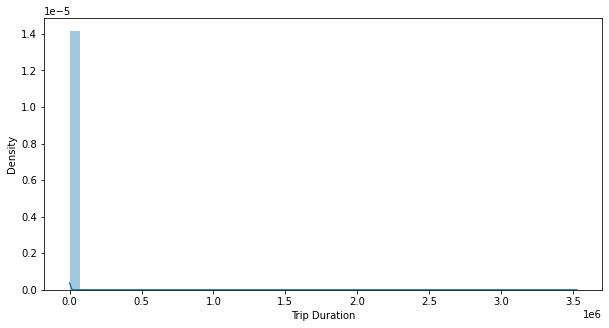

In [44]:
#distribution plot for trip duration after setting upper limit
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

This distribution shows right skewness, hence let's apply the log10 to transform it to the normal distribution.

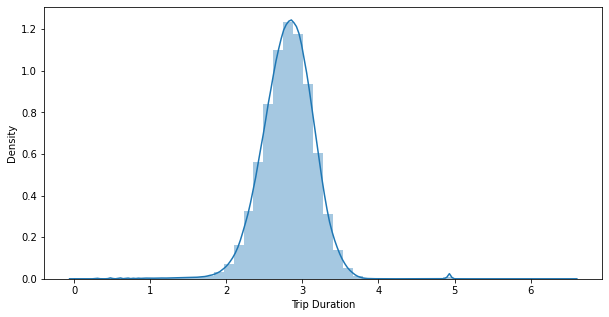

In [45]:
#distribution plot for trip duration applying log of trip_duration
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

* Here, we can see that trip_duration is normally distributed.
* There are some outliers. Lets see the boxplot of this variable.